<a href="https://colab.research.google.com/github/Ras-hi/mlproject1/blob/main/Transfer_Learning_Inception_V3_Fish_DIsease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [ ]:
!pip install tensorflow==2.11.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import TensorFlow
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.11.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Mon Mar 20 16:40:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [42]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [43]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [44]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/train'

In [45]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [46]:
for layer in resnet.layers:
    layer.trainable = False

In [47]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/*')

In [48]:
folders

['/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/Argulus',
 '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/Broken antennae and rostrum',
 '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/EUS',
 '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/Local Fish',
 '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/Red Spot',
 '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/Tail And Fin Rot',
 '/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test/THE BACTERIAL GILL ROT']

In [49]:
x = Flatten()(resnet.output)

In [50]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [52]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 75 images belonging to 7 classes.


In [56]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Freshwater Fish Disease Dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 17 images belonging to 7 classes.


In [57]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-57-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
3/3 [==============================] - 20s 2s/step - loss: 4.2985 - accuracy: 0.4800 - val_loss: 19.0666 - val_accuracy: 0.2941
Epoch 2/50
3/3 [==============================] - 1s 423ms/step - loss: 5.7991 - accuracy: 0.6133 - val_loss: 13.8388 - val_accuracy: 0.2353
Epoch 3/50
3/3 [==============================] - 1s 417ms/step - loss: 3.7329 - accuracy: 0.6400 - val_loss: 13.0636 - val_accuracy: 0.2941
Epoch 4/50
3/3 [==============================] - 1s 614ms/step - loss: 4.8731 - accuracy: 0.6533 - val_loss: 8.7356 - val_accuracy: 0.2941
Epoch 5/50
3/3 [==============================] - 1s 614ms/step - loss: 5.6059 - accuracy: 0.3733 - val_loss: 6.0122 - val_accuracy: 0.4118
Epoch 6/50
3/3 [==============================] - 1s 422ms/step - loss: 3.2233 - accuracy: 0.6667 - val_loss: 9.2292 - val_accuracy: 0.2941
Epoch 7/50
3/3 [==============================] - 1s 413ms/step - loss: 2.8765 - accuracy: 0.6267 - val_loss: 10.2023 - val_accuracy: 0.2941
Epoch 8/50
3/3 [==

In [66]:
scores=model.evaluate(test_set)

1/1 [==============================] - 0s 266ms/step - loss: 1.6503 - accuracy: 0.3529


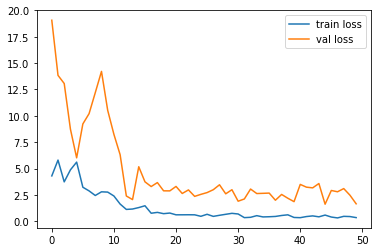

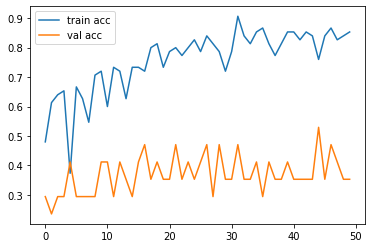

<Figure size 432x288 with 0 Axes>

In [67]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [69]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

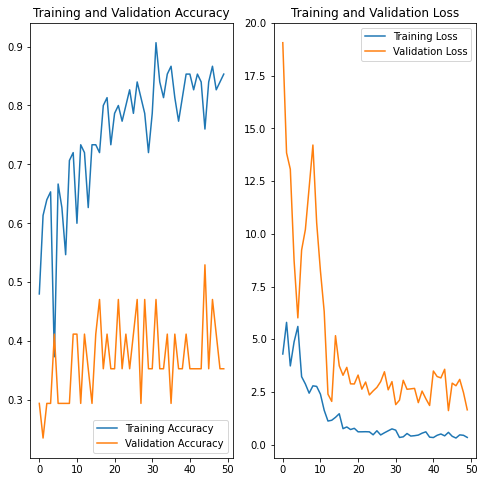

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [60]:
y_pred = model.predict(test_set)

1/1 [==============================] - 1s 973ms/step


In [68]:
y_pred

array([2, 3, 3, 2, 2, 2, 6, 3, 3, 3, 2, 4, 4, 3, 3, 4, 3])

In [62]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [63]:
y_pred

array([2, 3, 3, 2, 2, 2, 6, 3, 3, 3, 2, 4, 4, 3, 3, 4, 3])

In [64]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image